In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [9]:
df.shape

(8425, 23)

Observation: there are 8425 rows and 23 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Observation: we have observe that , from the 23 columns there are 21 columns where the missing values are present. Only 2 columns have the complete data. we'll treat this. And there are float64(16) and Object(7) data type present in our dataset

In [26]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Observation: we have observed that missing value present in almost all columns except 2 column. so we have to fill this nan. For categorical columns we will use the mode method and for continuous columns we go for the mean method. Let's do it

# Analysing numerical columns:

In [33]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [36]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]

print("Discrete Feature Count {}".format(len(discrete_feature)))
print(discrete_feature)

print("--------------------------------------------")

print("Continuous Feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Discrete Feature Count 2
['Cloud9am', 'Cloud3pm']
--------------------------------------------
Continuous Feature Count 14
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [39]:
# checking the number of unique values in each columns
df.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           286
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

Observation: target column has binary values so we'll use binary classification

In [27]:
# filling null values for categorical columns with mode method

df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [28]:
# filling null values for continuous columns with mean method

df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [30]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Observation: we have successfully fill the NaN's

In [11]:
#All variable names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
#check the datatype of all variables
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
#check Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Locat

# EDA

Univariate analysis: categorical data plotting countplot and that will give us the flow of the data

In [14]:
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

In [16]:
df['Date'].nunique()

3004

Observation: here we have observed that 'Date' is a categorical column and have 3000 unique values. These are the large numbers. So, we can't go for the countplot for this data

In [17]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [18]:
df['Location'].nunique()

12

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


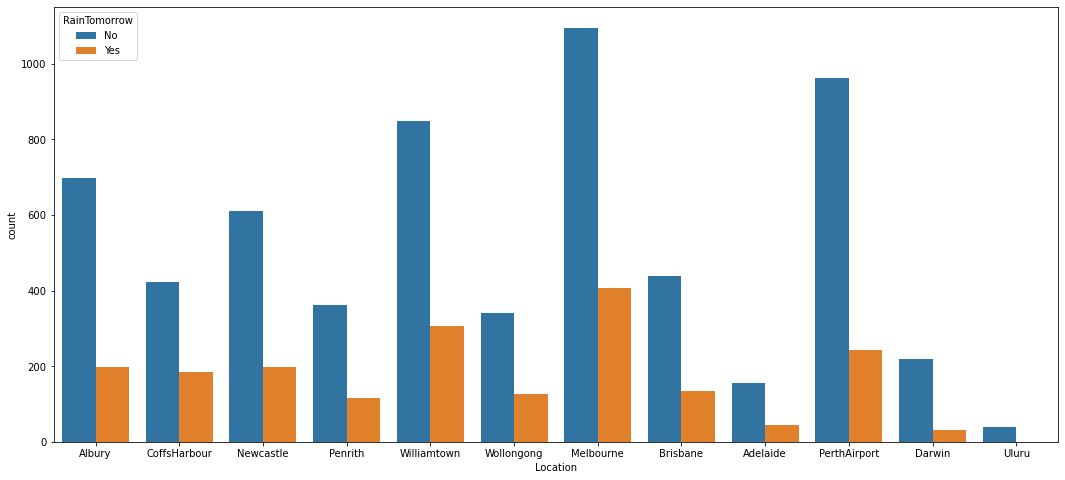

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(df['Location'],hue=df['RainTomorrow'])
print(df['Location'].value_counts())

In [41]:
#check the unique of variable
print(df['WindGustDir'].unique())
#count the unique values
print(df['WindGustDir'].value_counts())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


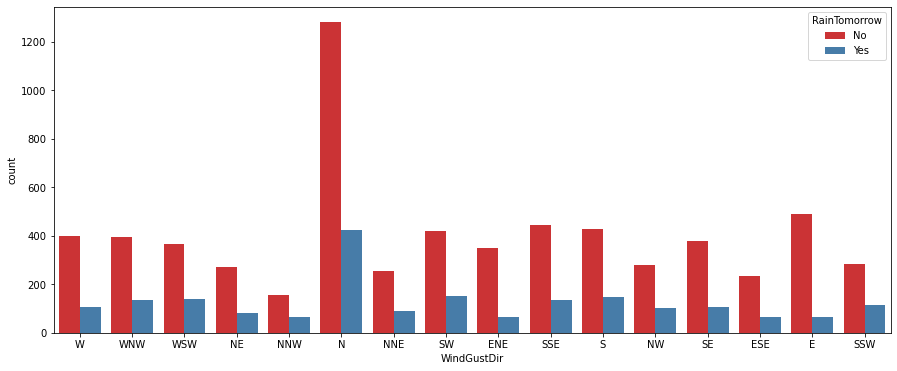

In [42]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'],palette='Set1');

In [43]:
#check the unique of variable
print(df['WindDir9am'].unique())
#count the unique values
print(df['WindDir9am'].value_counts())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


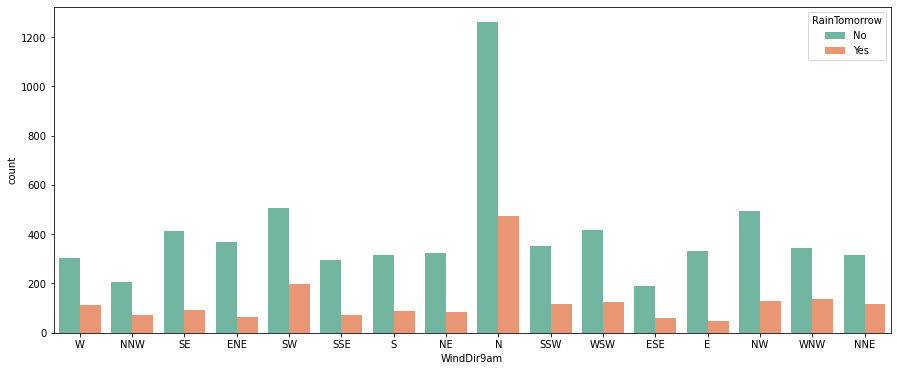

In [44]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'],palette='Set2');

In [45]:
#check the unique of variable
print(df['WindDir3pm'].unique())
#count the unique values
print(df['WindDir3pm'].value_counts())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


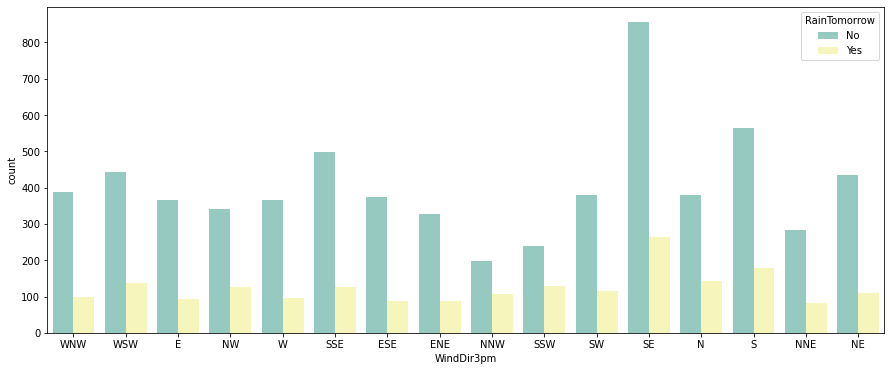

In [46]:
#count plot
plt.figure(figsize=(15,6))
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'],palette='Set3');

In [47]:
#check the unique of variable
print(df['RainToday'].unique())
#count the unique values
print(df['RainToday'].value_counts())

['No' 'Yes']
No     6435
Yes    1990
Name: RainToday, dtype: int64


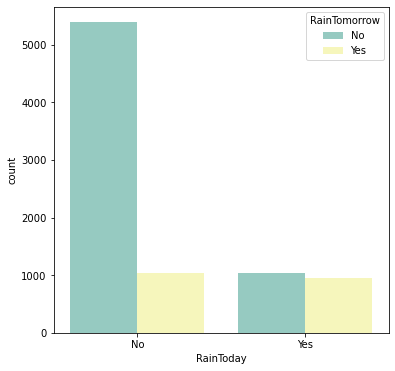

In [48]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainToday'],hue=df['RainTomorrow'],palette='Set3');

Observation: If Today have Rain means there is chance of Rain Tomorrow

In [49]:
#check the unique of variable
print(df['RainTomorrow'].unique())
#count the unique values
print(df['RainTomorrow'].value_counts())

['No' 'Yes']
No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


In [50]:
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)

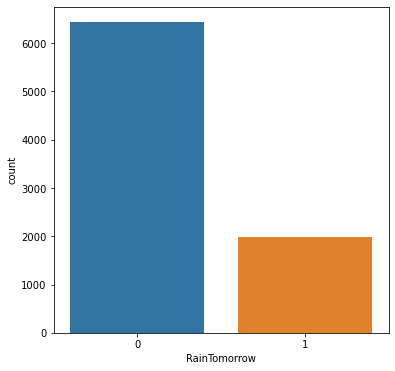

In [51]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(df['RainTomorrow']);

Observation: Data is imbalanced. we'll treat later

In [52]:
#describe dataset
df.describe().T

count         mean        std    min          25%  \
MinTemp        8425.0    13.193305   5.379488   -2.0     9.300000   
MaxTemp        8425.0    13.193305   5.379488   -2.0     9.300000   
Rainfall       8425.0     2.805913  10.309308    0.0     0.000000   
Evaporation    8425.0     5.389395   3.852004    0.0     4.000000   
Sunshine       8425.0     7.632205   2.825451    0.0     7.632205   
WindGustSpeed  8425.0    40.174469  13.776101    7.0    31.000000   
WindSpeed9am   8425.0    13.847646  10.128579    0.0     6.000000   
WindSpeed3pm   8425.0    18.533662   9.704759    0.0    11.000000   
Humidity9am    8425.0    67.822496  16.774231   10.0    56.000000   
Humidity3pm    8425.0    51.249790  18.311894    6.0    39.000000   
Pressure9am    8425.0  1017.640233   6.275759  989.8  1014.000000   
Pressure3pm    8425.0  1015.236075   6.217451  982.9  1011.400000   
Cloud9am       8425.0     4.566622   2.429205    0.0     3.000000   
Cloud3pm       8425.0     4.503183   2.299419    0.0     3.000000   
Temp9am        8425.0    17.762015   5.608301    1.9    13.800000   
Temp3pm        8425.0    22.442934   5.945849    7.3    18.100000   
RainTomorrow   8425.0     0.236320   0.424846    0.0     0.000000   

                       50%          75%     max  
MinTemp          13.200000    17.300000    28.5  
MaxTemp          13.200000    17.300000    28.5  
Rainfall          0.000000     1.400000   371.0  
Evaporation       5.389395     5.389395   145.0  
Sunshine          7.632205     8.900000    13.9  
WindGustSpeed    40.174469    48.000000   107.0  
WindSpeed9am     13.000000    20.000000    63.0  
WindSpeed3pm     19.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      51.000000    63.000000    99.0  
Pressure9am    1017.640233  1021.300000  1039.0  
Pressure3pm    1015.236075  1018.800000  1036.0  
Cloud9am          4.566622     7.000000     8.0  
Cloud3pm          4.503183     7.000000     8.0  
Temp9am          17.762015    21.900000    39.4  
Temp3pm          22.000000    26.300000    44.1  
RainTomorrow      0.000000     0.000000     1.0

# Apply Label Encoder

In [53]:
df1=df.copy()#copy the dataset
x=df1.drop('RainTomorrow',axis=1)#independent variables
y=df1['RainTomorrow']#Target variable

In [54]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)#applying LabelEncoder

In [55]:
df1=x #make dataframe and add target variable
df1['RainTomorrow']=y

In [56]:
df1.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1      150      150         5           28        77   
1     1         1       89       89         0           28        77   
2     2         1      144      144         0           28        77   
3     3         1      107      107         0           28        77   
4     4         1      191      191         8           28        77   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13             21          13  ...           61           16   
1           14             21           6  ...           33           19   
2           15             22          13  ...           27           24   
3            4              9           9  ...           34           10   
4           13             19           1  ...           72           27   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0           90          103         9         5      145      134          0   
1          119          110         5         5      148      160          0   
2           89          119         5         2      187      149          0   
3          189          160         5         5      158      182          0   
4          121           92         8         9      155      214          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

# Plotting the Heatmap:

<AxesSubplot:>

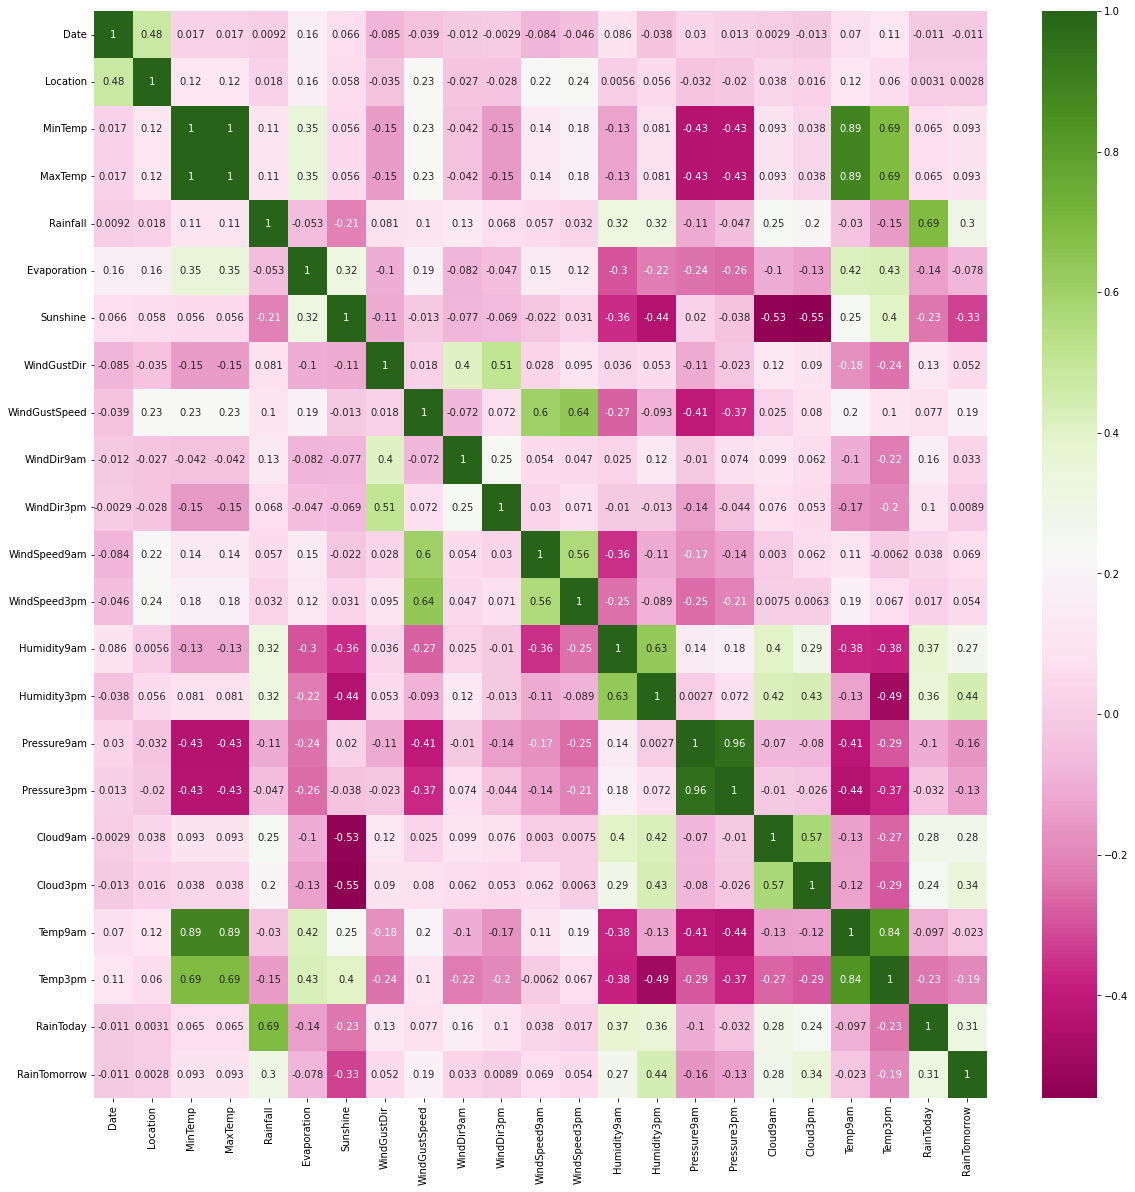

In [62]:
#checking correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='PiYG')

In [63]:
#check correlation with each other
df1.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016757  0.016757  0.009158     0.161837   
Location       0.475037  1.000000  0.116680  0.116680  0.018164     0.160332   
MinTemp        0.016757  0.116680  1.000000  1.000000  0.105315     0.350090   
MaxTemp        0.016757  0.116680  1.000000  1.000000  0.105315     0.350090   
Rainfall       0.009158  0.018164  0.105315  0.105315  1.000000    -0.053460   
Evaporation    0.161837  0.160332  0.350090  0.350090 -0.053460     1.000000   
Sunshine       0.065733  0.057771  0.056010  0.056010 -0.210424     0.316196   
WindGustDir   -0.084552 -0.035408 -0.145701 -0.145701  0.081221    -0.103835   
WindGustSpeed -0.039276  0.231501  0.230027  0.230027  0.102154     0.188847   
WindDir9am    -0.012369 -0.027103 -0.041941 -0.041941  0.131358    -0.082053   
WindDir3pm    -0.002895 -0.027736 -0.147805 -0.147805  0.067595    -0.046839   
WindSpeed9am  -0.083774  0.223398  0.135848  0.135848  0.057465     0.146507   
WindSpeed3pm  -0.046043  0.235268  0.180769  0.180769  0.032475     0.123810   
Humidity9am    0.086080  0.005638 -0.129359 -0.129359  0.318877    -0.296954   
Humidity3pm   -0.038106  0.055915  0.080576  0.080576  0.315005    -0.219242   
Pressure9am    0.029876 -0.032385 -0.432260 -0.432260 -0.106416    -0.243377   
Pressure3pm    0.013289 -0.020237 -0.426269 -0.426269 -0.046501    -0.255824   
Cloud9am       0.002934  0.037542  0.093438  0.093438  0.250101    -0.100585   
Cloud3pm      -0.013024  0.016119  0.038074  0.038074  0.203319    -0.133361   
Temp9am        0.070465  0.117723  0.887402  0.887402 -0.030015     0.416408   
Temp3pm        0.113730  0.060170  0.686593  0.686593 -0.147067     0.426255   
RainToday     -0.011365  0.003071  0.064838  0.064838  0.686172    -0.140285   
RainTomorrow  -0.011228  0.002824  0.092922  0.092922  0.295745    -0.078041   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.065733    -0.084552      -0.039276   -0.012369  ...   
Location       0.057771    -0.035408       0.231501   -0.027103  ...   
MinTemp        0.056010    -0.145701       0.230027   -0.041941  ...   
MaxTemp        0.056010    -0.145701       0.230027   -0.041941  ...   
Rainfall      -0.210424     0.081221       0.102154    0.131358  ...   
Evaporation    0.316196    -0.103835       0.188847   -0.082053  ...   
Sunshine       1.000000    -0.106173      -0.013310   -0.076650  ...   
WindGustDir   -0.106173     1.000000       0.018140    0.403562  ...   
WindGustSpeed -0.013310     0.018140       1.000000   -0.071561  ...   
WindDir9am    -0.076650     0.403562      -0.071561    1.000000  ...   
WindDir3pm    -0.068775     0.505799       0.071703    0.249527  ...   
WindSpeed9am  -0.021564     0.027915       0.602591    0.054401  ...   
WindSpeed3pm   0.030868     0.094911       0.640484    0.047275  ...   
Humidity9am   -0.361136     0.035730      -0.269905    0.024917  ...   
Humidity3pm   -0.440455     0.052549      -0.092702    0.124468  ...   
Pressure9am    0.020112    -0.108534      -0.405308   -0.010415  ...   
Pressure3pm   -0.038393    -0.023267      -0.369593    0.073987  ...   
Cloud9am      -0.533121     0.120274       0.025188    0.098617  ...   
Cloud3pm      -0.546233     0.089615       0.079771    0.062000  ...   
Temp9am        0.250462    -0.177180       0.200850   -0.103552  ...   
Temp3pm        0.396063    -0.239685       0.101090   -0.222360  ...   
RainToday     -0.234619     0.125188       0.076915    0.157324  ...   
RainTomorrow  -0.327982     0.051832       0.190116    0.032860  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.086080    -0.038106     0.029876     0.013289  0.002934   
Location          0.005638     0.055915    -0.032385    -0.020237  0.037542   
MinTemp          -0.129359     0.080576    -0.432260    -0.426269  0.093438   
MaxTemp          -0.129359     0.080576    -0.432260 

# Observations:-

1.Date variable is Positive correlation with Location variable
2.Maximum Temperture variable is high positive correlation with Minimum Temperture variable
3.Temp9am and Temp3pm high Positive correlation with Minimum and Maximum Temperture Variables
4.Rain day is High Positive correlation with Rainfall variable
5.Cloud9am and Cloud3pm High Negative correlation with Sunshine variable
6.WindSpeed9am and WindSpeed3pm variables are High Positive correlation with WindGustSpeed variable
7.Pressure9am and Pressure3pm High Negative correlation with Minimum Temperture
8.Pressure9am and Pressure3pm High Negative correlation with WindGustSpeed variable
9.Humidity9am is High Positive correlation with the Humidity3pm variable
10.Pressure9am and Pressure3pm High Positive Correlation with Each other
11.Cloud9am and Cloud9am variables are High Positive correlations with Each other
12.Temp9am and Temp9am are High Positive Correlation with Each Other
13.WindSpeed9am and WindSpeed3pm variables are High Positive Correlation with each other
14.Cloud9am and Cloud9am variables are High Positive correlations with Humidity9am and Humidity3pm
15.Temp9am and Temp9am are High Negative Correlation with Humidity9am and Humidity3pm Also Pressure9am and Pressure3pm

# Target Variable Correlation

In [64]:
df_target=df1.corr()
df_target['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444154
Cloud3pm         0.341869
RainToday        0.312929
Rainfall         0.295745
Cloud9am         0.277451
Humidity9am      0.271543
WindGustSpeed    0.190116
MinTemp          0.092922
MaxTemp          0.092922
WindSpeed9am     0.069317
WindSpeed3pm     0.054107
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023154
Evaporation     -0.078041
Pressure3pm     -0.133168
Pressure9am     -0.162720
Temp3pm         -0.193915
Sunshine        -0.327982
Name: RainTomorrow, dtype: float64

Observation: 

Humidity3pm,Cloud3pm,RainToday,Rainfall and Cloud9am variables are positive correlation with Target variable

Pressure3pm,MaxTemp,Pressure9am,Temp3pm and Sunshine variables are Negative correlation with Target Variable


# Scatterplot Analysis:

In [65]:
sns.set_theme()#set the Theme

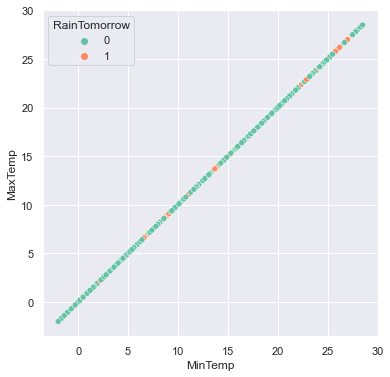

In [66]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','MaxTemp',hue='RainTomorrow',data=df,palette='Set2');

Observation: If you observe Minimum Temperture , It will increase when maximum temperture increase

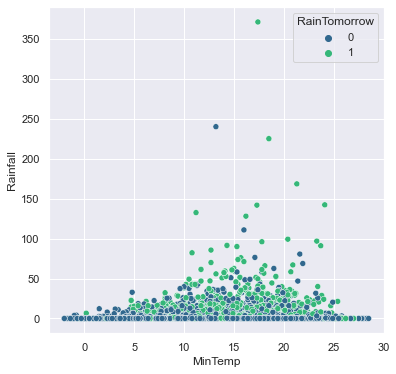

In [67]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Rainfall',hue='RainTomorrow',data=df,palette='viridis');

Observation: If the minimum temperture b/w 5 to 25 there is a chance of high Rainfall

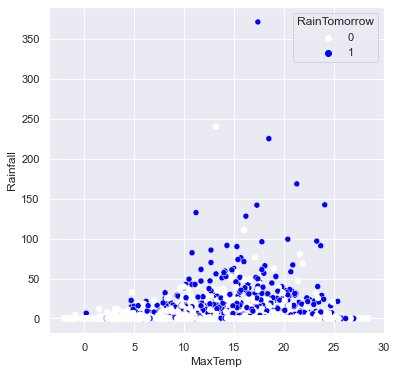

In [68]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Rainfall',hue='RainTomorrow',data=df,palette='flag');

Observation: If you observe Maximum temperture , when temperture b/w 35 to 45 there is no chance of high Rainfall

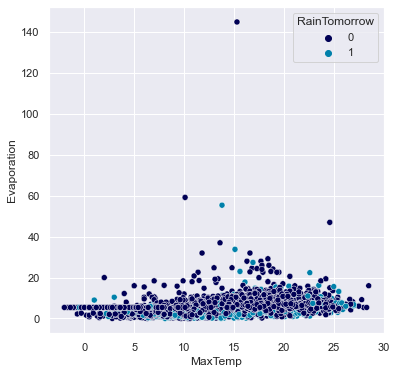

In [69]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MaxTemp','Evaporation',hue='RainTomorrow',data=df,palette='ocean');

If you observe Evaporation , when Evaporation increase when Maximum Tempertrue increase . There is a little bit Evaporation high in high temperture

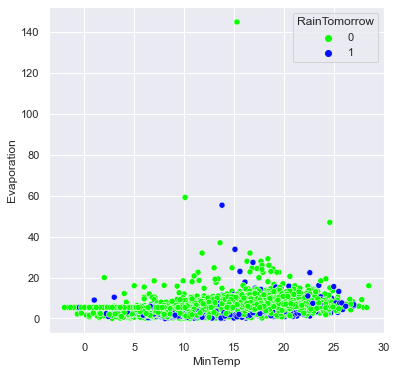

In [70]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('MinTemp','Evaporation',hue='RainTomorrow',data=df,palette='hsv');

If you observe here very fine amount of Evaporation increase when minimum temperture increase

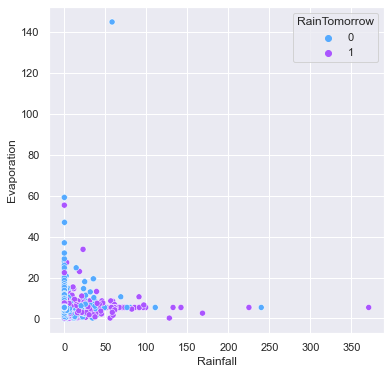

In [71]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Evaporation',hue='RainTomorrow',data=df,palette='cool');

If you observe Evaporation here , 0 Rainfall have high Evaporation. if Rainfall increase there is Evaporation is constant b/w 0 to 20.

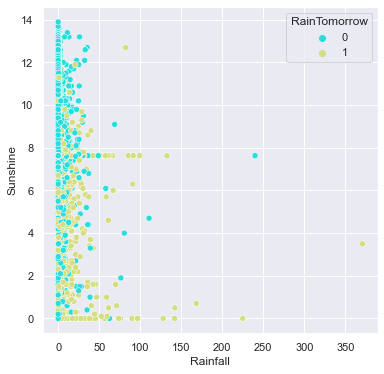

In [72]:
#make scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot('Rainfall','Sunshine',hue='RainTomorrow',data=df,palette='rainbow');

If you observe here Maximum Sunshine point in 0 Rainfall. Maximum Sunshine points have in b/w 0 to 50 Rainfall

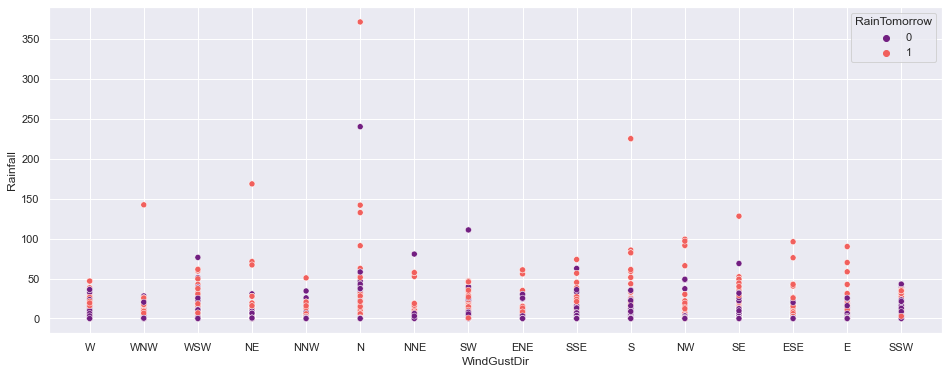

In [73]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustDir','Rainfall',hue='RainTomorrow',data=df,palette='magma');

The North direction of the strongest wind gust and North direction wind gust have Maximum Rainfall and West-North-West(WNW) has low Rainfall.

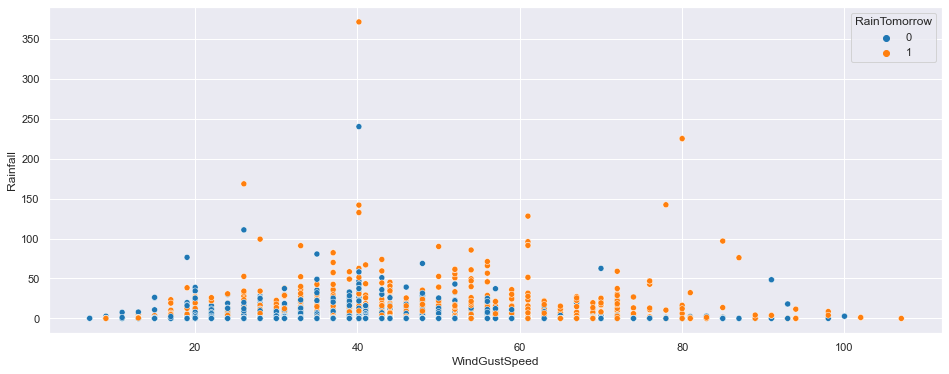

In [74]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindGustSpeed','Rainfall',hue='RainTomorrow',data=df,palette='tab10');

The speed (km/h) of the strongest wind gust in b/w 30 to 60 have High Rainfall and as well as chance of Rain in b/w 30 to 70 wind speed.

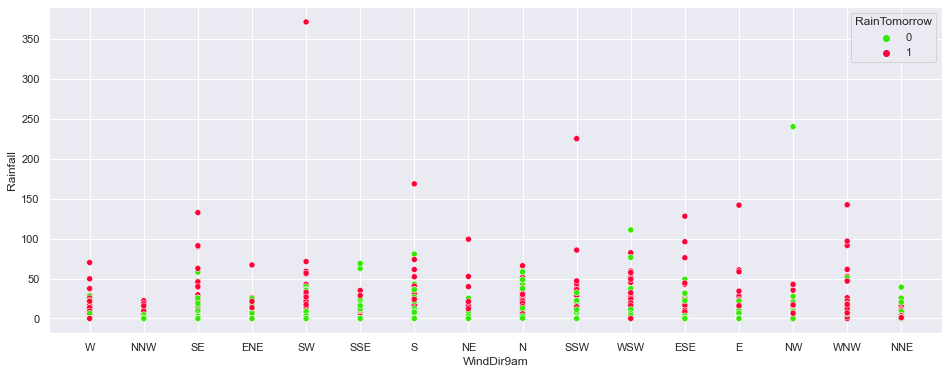

In [75]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir9am','Rainfall',hue='RainTomorrow',data=df,palette='prism');

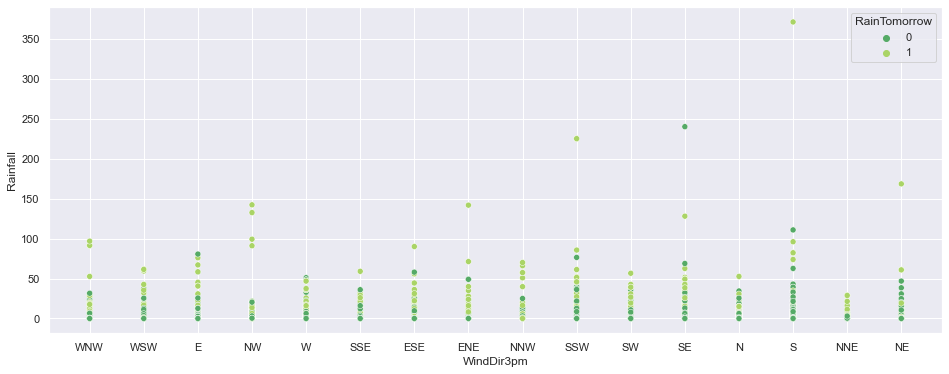

In [76]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindDir3pm','Rainfall',hue='RainTomorrow',data=df,palette='summer');

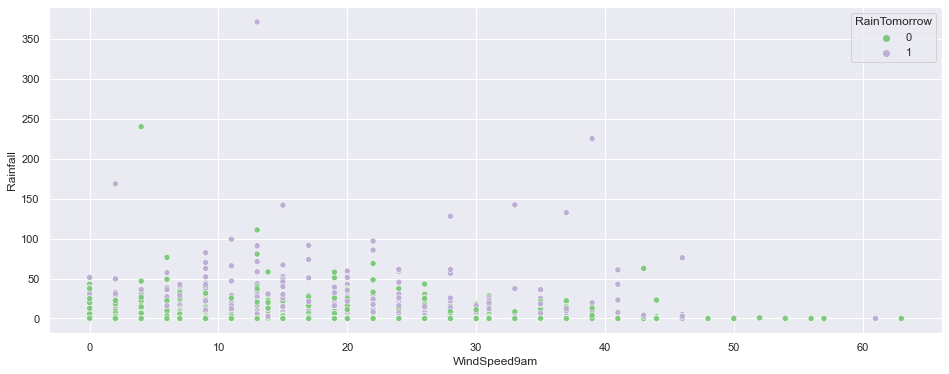

In [77]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed9am','Rainfall',hue='RainTomorrow',data=df,palette='Accent');

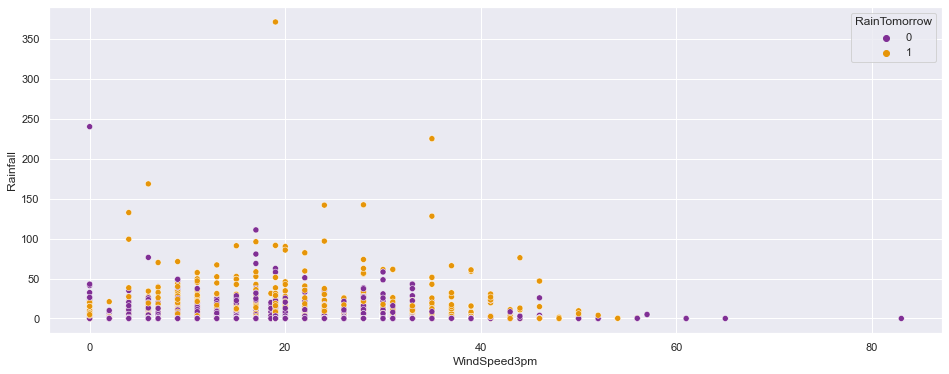

In [78]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('WindSpeed3pm','Rainfall',hue='RainTomorrow',data=df,palette='CMRmap');

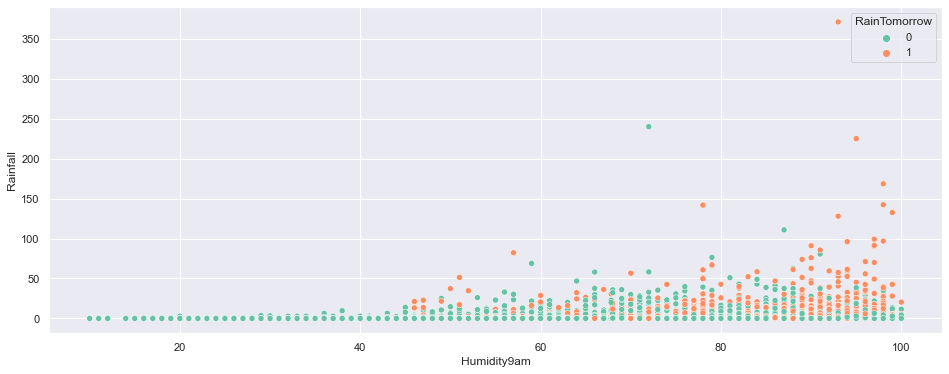

In [79]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity9am','Rainfall',hue='RainTomorrow',data=df,palette='Set2');

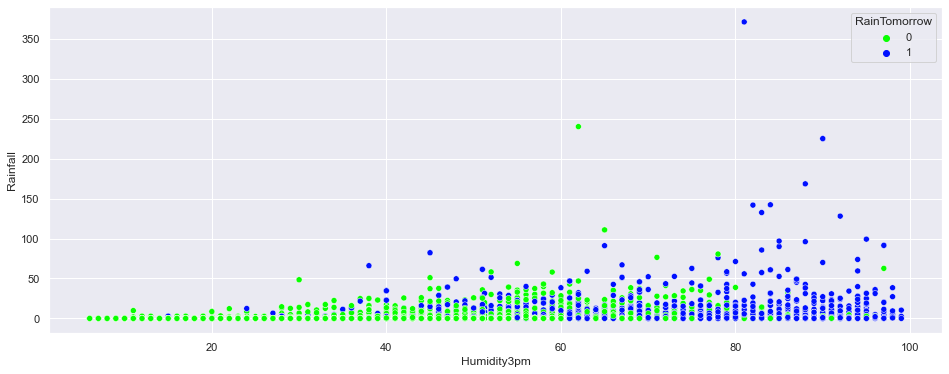

In [80]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Humidity3pm','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

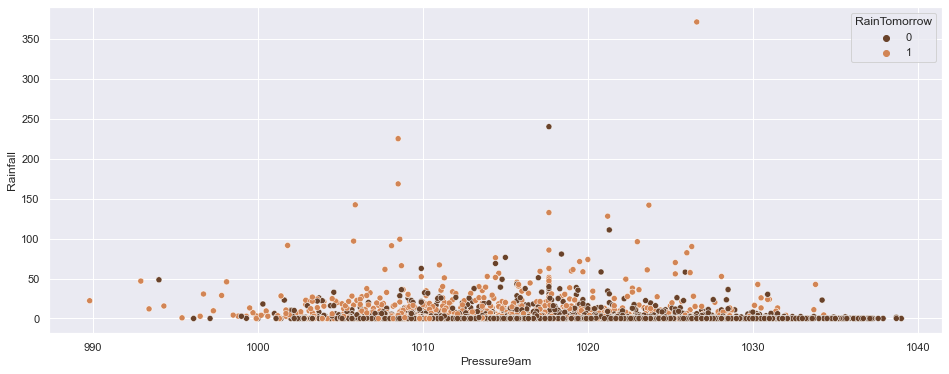

In [81]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure9am','Rainfall',hue='RainTomorrow',data=df,palette='copper');

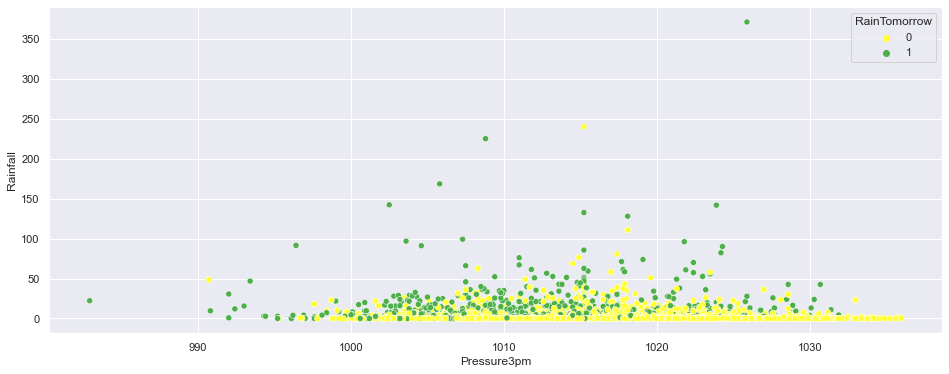

In [82]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Pressure3pm','Rainfall',hue='RainTomorrow',data=df,palette='Set1_r');

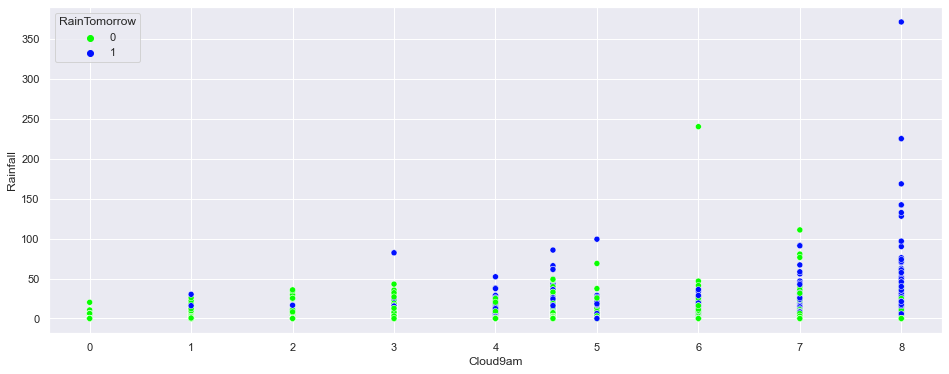

In [83]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud9am','Rainfall',hue='RainTomorrow',data=df,palette='hsv');

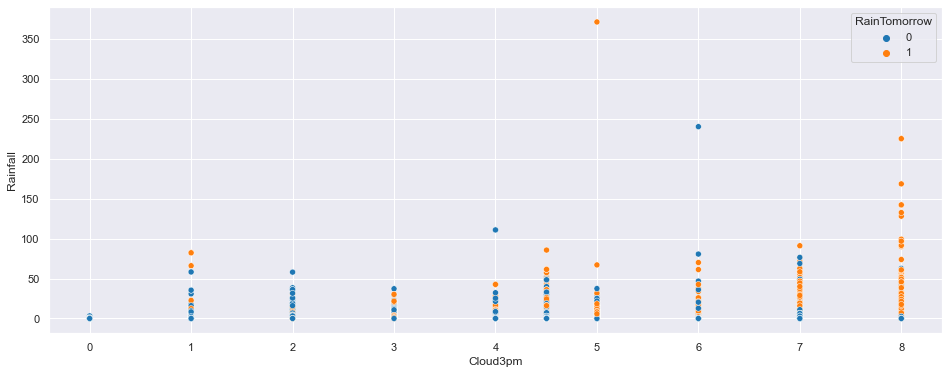

In [84]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Cloud3pm','Rainfall',hue='RainTomorrow',data=df,palette='tab10');

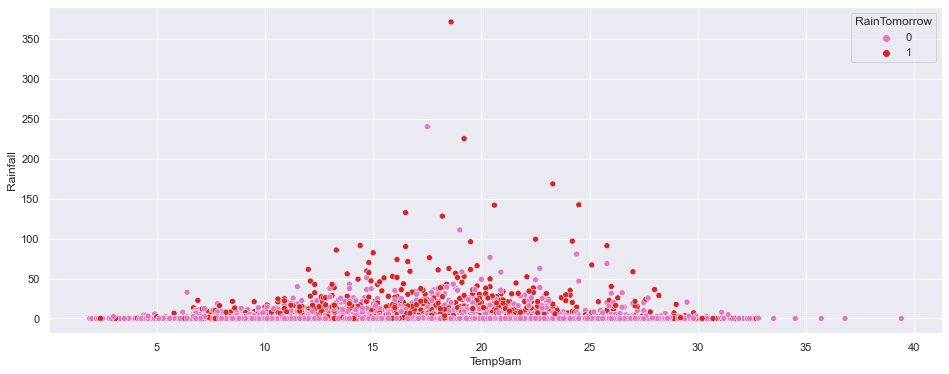

In [85]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp9am','Rainfall',hue='RainTomorrow',data=df,palette='tab10_r');

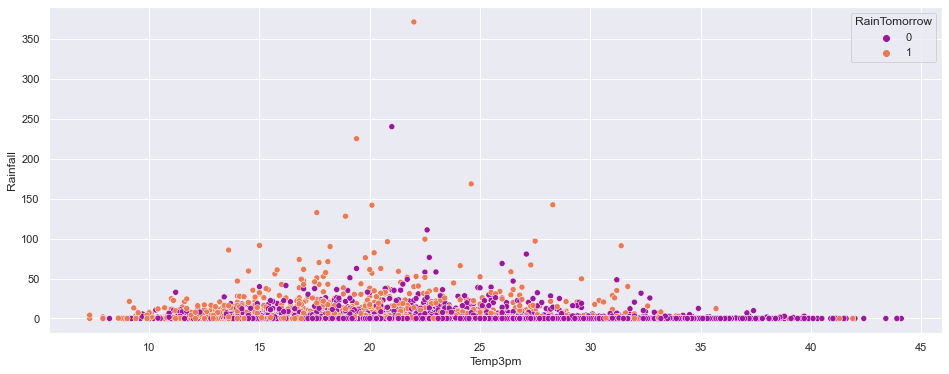

In [86]:
#make scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot('Temp3pm','Rainfall',hue='RainTomorrow',data=df,palette='plasma');

# Pair Plot

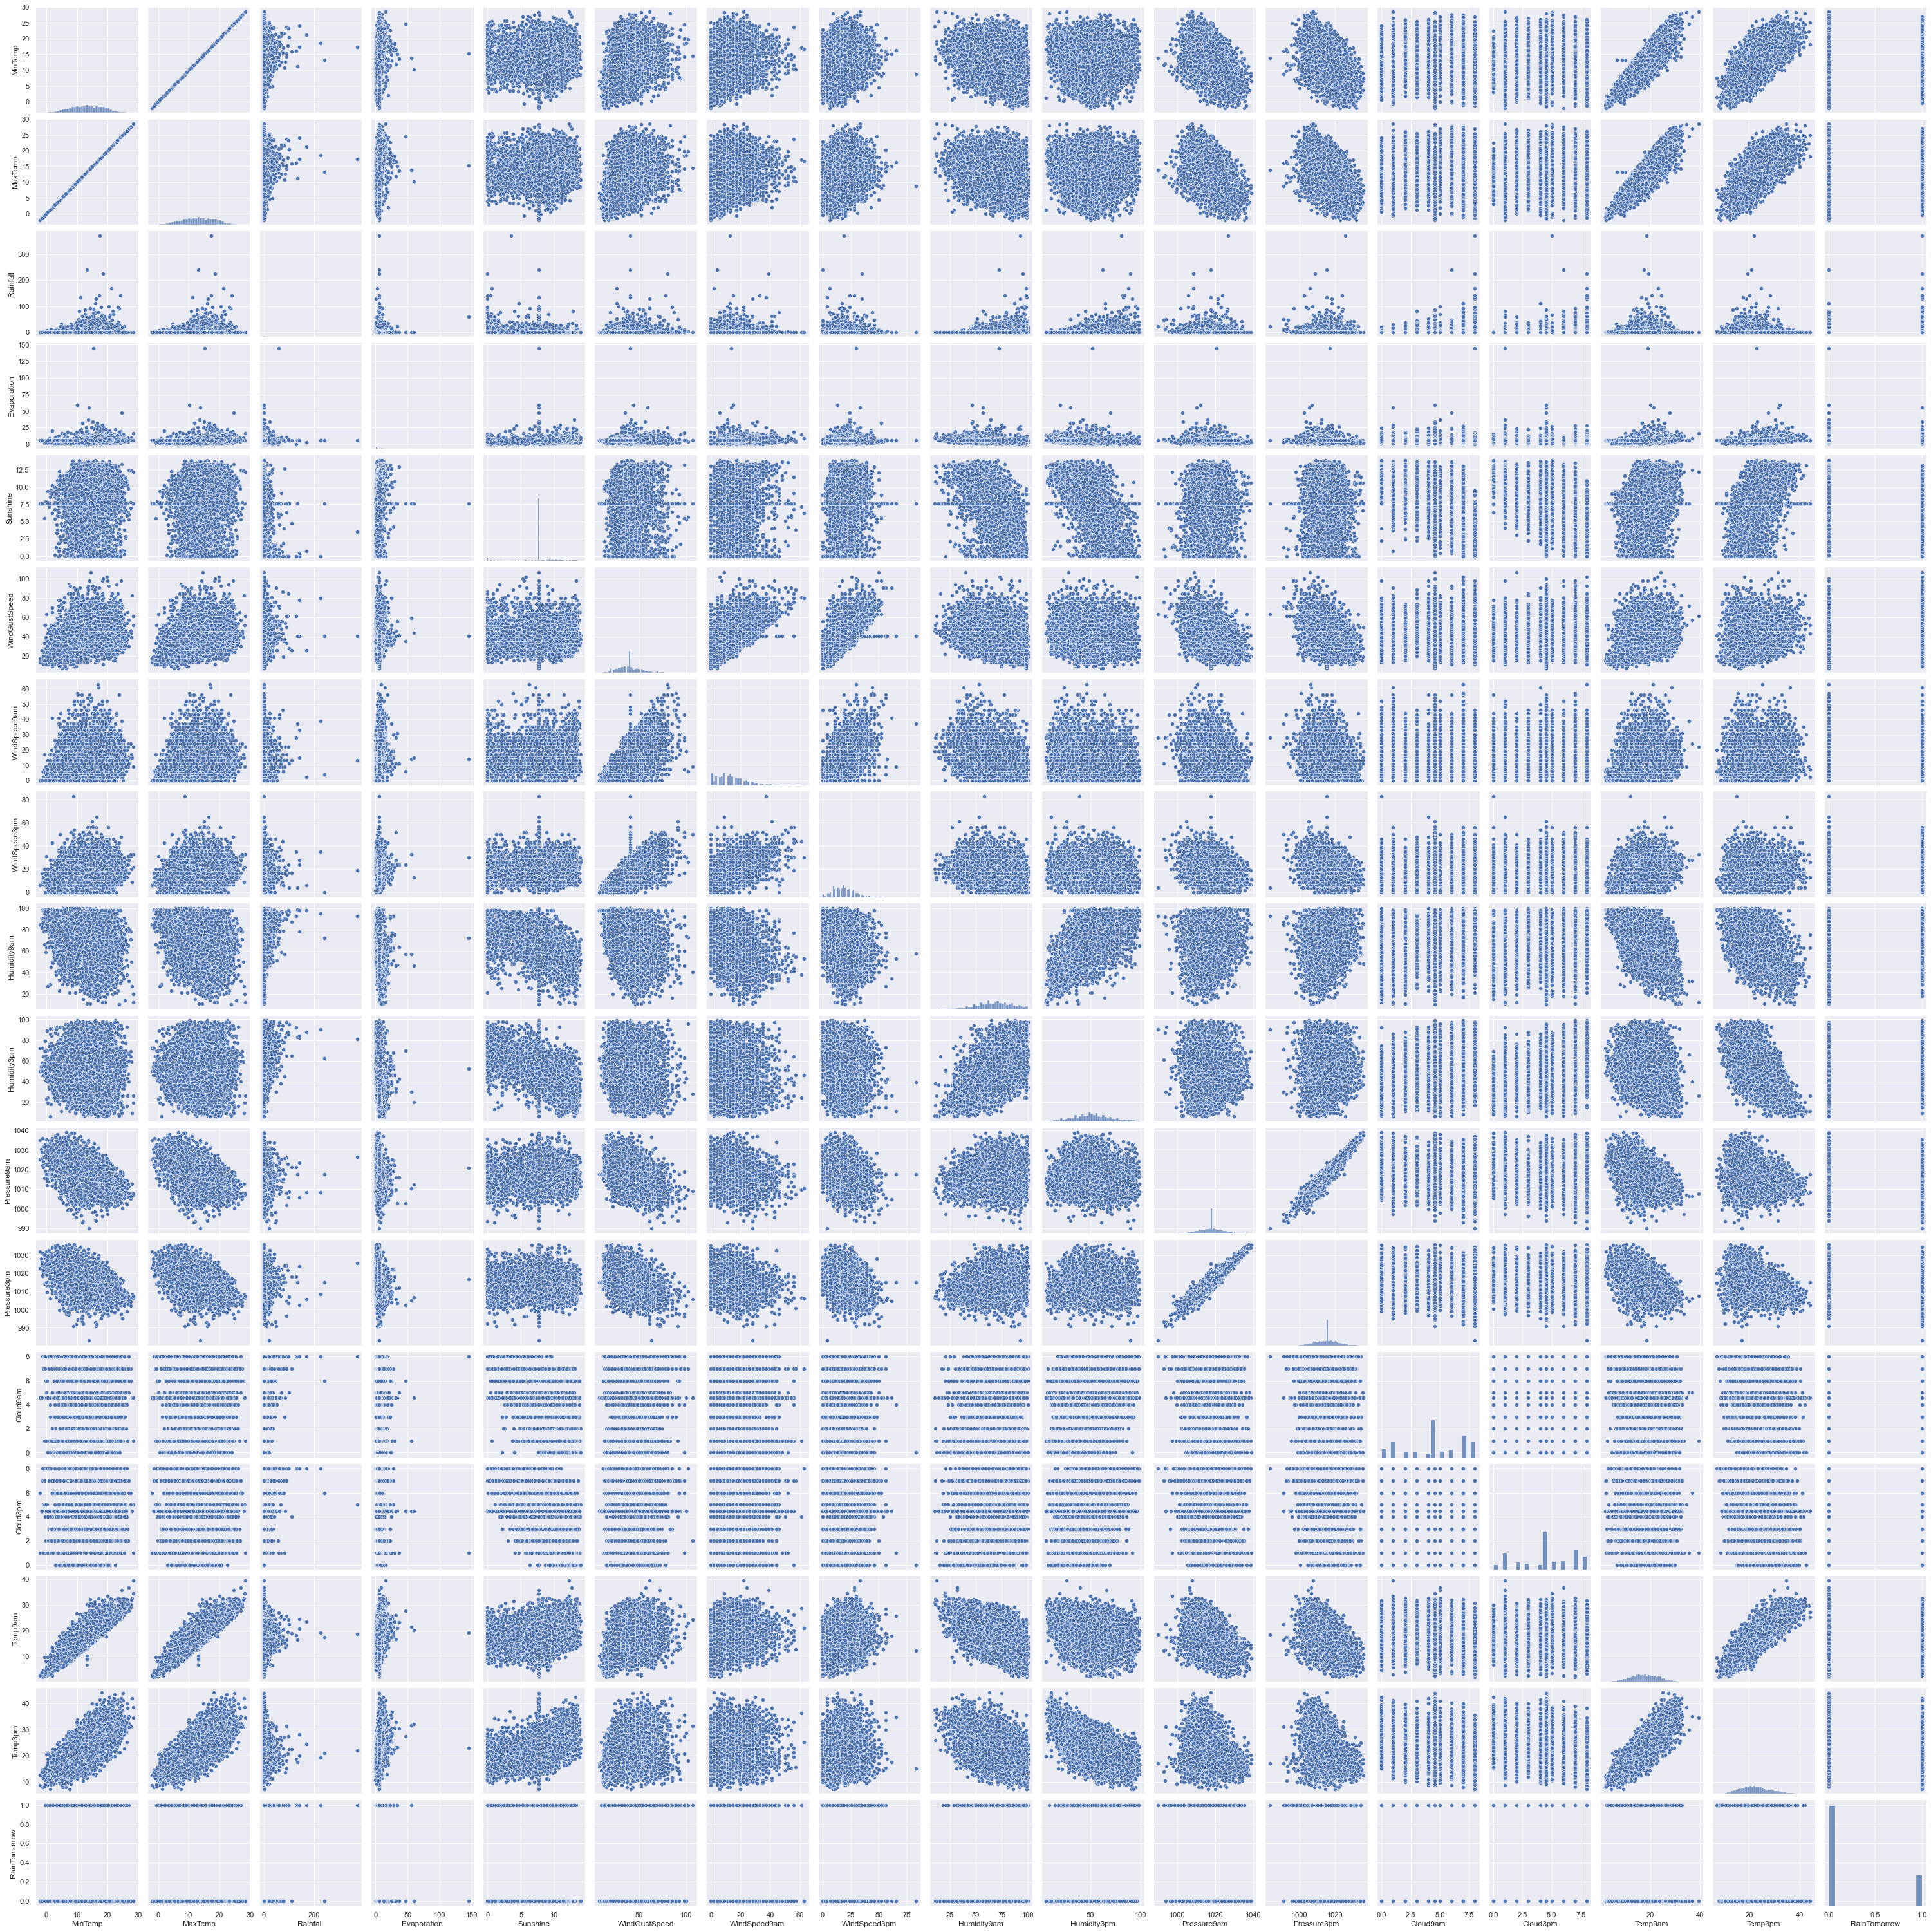

In [87]:
sns.pairplot(df)

# Imbalanced Learn:

In [88]:
#Apply SMOTE bcz dataset is imbalanced to make Balanced apply SMOTE
from imblearn.over_sampling import SMOTE

In [89]:
smt=SMOTE()

In [90]:
dfx=df1.drop('RainTomorrow',axis=1)
dfy=df1['RainTomorrow']

In [91]:
train_x,train_y=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

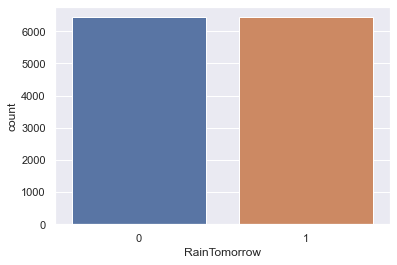

In [92]:
#count plot of target variable
sns.countplot(train_y)

In [93]:
#make dataframe
df1=train_x
#add Target variable
df1['RainTomorrow']=train_y

In [94]:
#Shape of the Dataset After applying SMOTE 
df1.shape

(12868, 23)

# Checking Outliers:

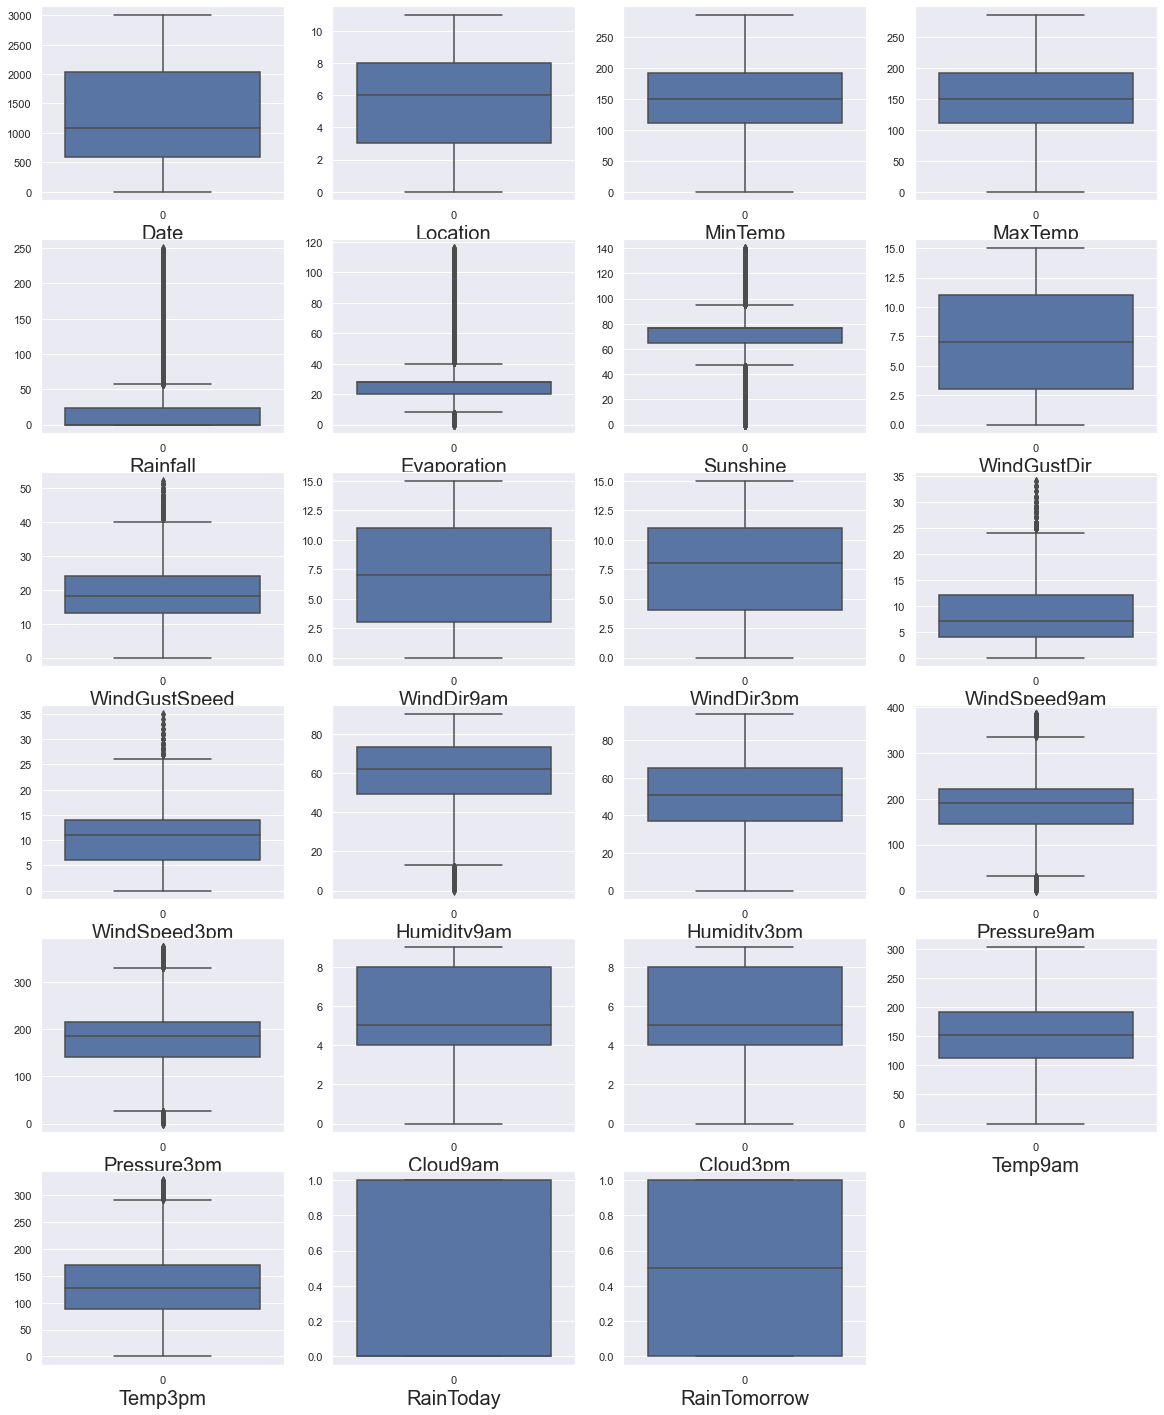

In [96]:
#Let's check for outliers
plt.figure(figsize=(20,25))
graph=1
for column in df1:
    if graph<=24:
        ax=plt.subplot(6,4,graph)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [97]:
from scipy.stats import zscore
z= np.abs(zscore(df1))

In [98]:
threshold= 3 
print(np.where(z>3))

(array([   44,    52,    59,    60,    61,    62,    66,    67,    68,
          69,   123,   267,   296,   381,   381,   388,   405,   406,
         407,   431,   462,   544,   563,   568,   568,   569,   684,
         699,   713,   770,   796,   797,   802,   803,   928,   935,
         949,   951,   979,   980,   980,   980,  1008,  1009,  1011,
        1108,  1138,  1148,  1149,  1151,  1187,  1189,  1202,  1203,
        1237,  1241,  1264,  1265,  1357,  1358,  1411,  1412,  1413,
        1479,  1480,  1481,  1501,  1513,  1514,  1535,  1587,  1644,
        1661,  1665,  1673,  1680,  1774,  1782,  1811,  1819,  1873,
        1898,  1903,  1945,  1954,  2016,  2028,  2043,  2063,  2074,
        2108,  2116,  2182,  2183,  2186,  2201,  2211,  2219,  2219,
        2230,  2231,  2265,  2429,  2488,  2505,  2510,  2527,  2541,
        2576,  2593,  2676,  2677,  2735,  2827,  2835,  2841,  2849,
        2849,  2853,  2855,  2859,  2863,  2869,  2877,  2883,  2886,
        2890,  2891

In [99]:
#removing outliers
df1=df1[(z<3).all(axis=1)]

In [100]:
#shape of the dataset after removing outliers
df1.shape

(11975, 23)

percentage loss of data:

In [101]:
data_loss=(((12868-11975)/12868)*100)
data_loss

6.939695368355611

# Checking Skewness

In [102]:
x=df1.drop('RainTomorrow',axis=1)#independent variables
y=df1['RainTomorrow']#target variable

In [103]:
#checking shape of independent variables
x.shape

(11975, 22)

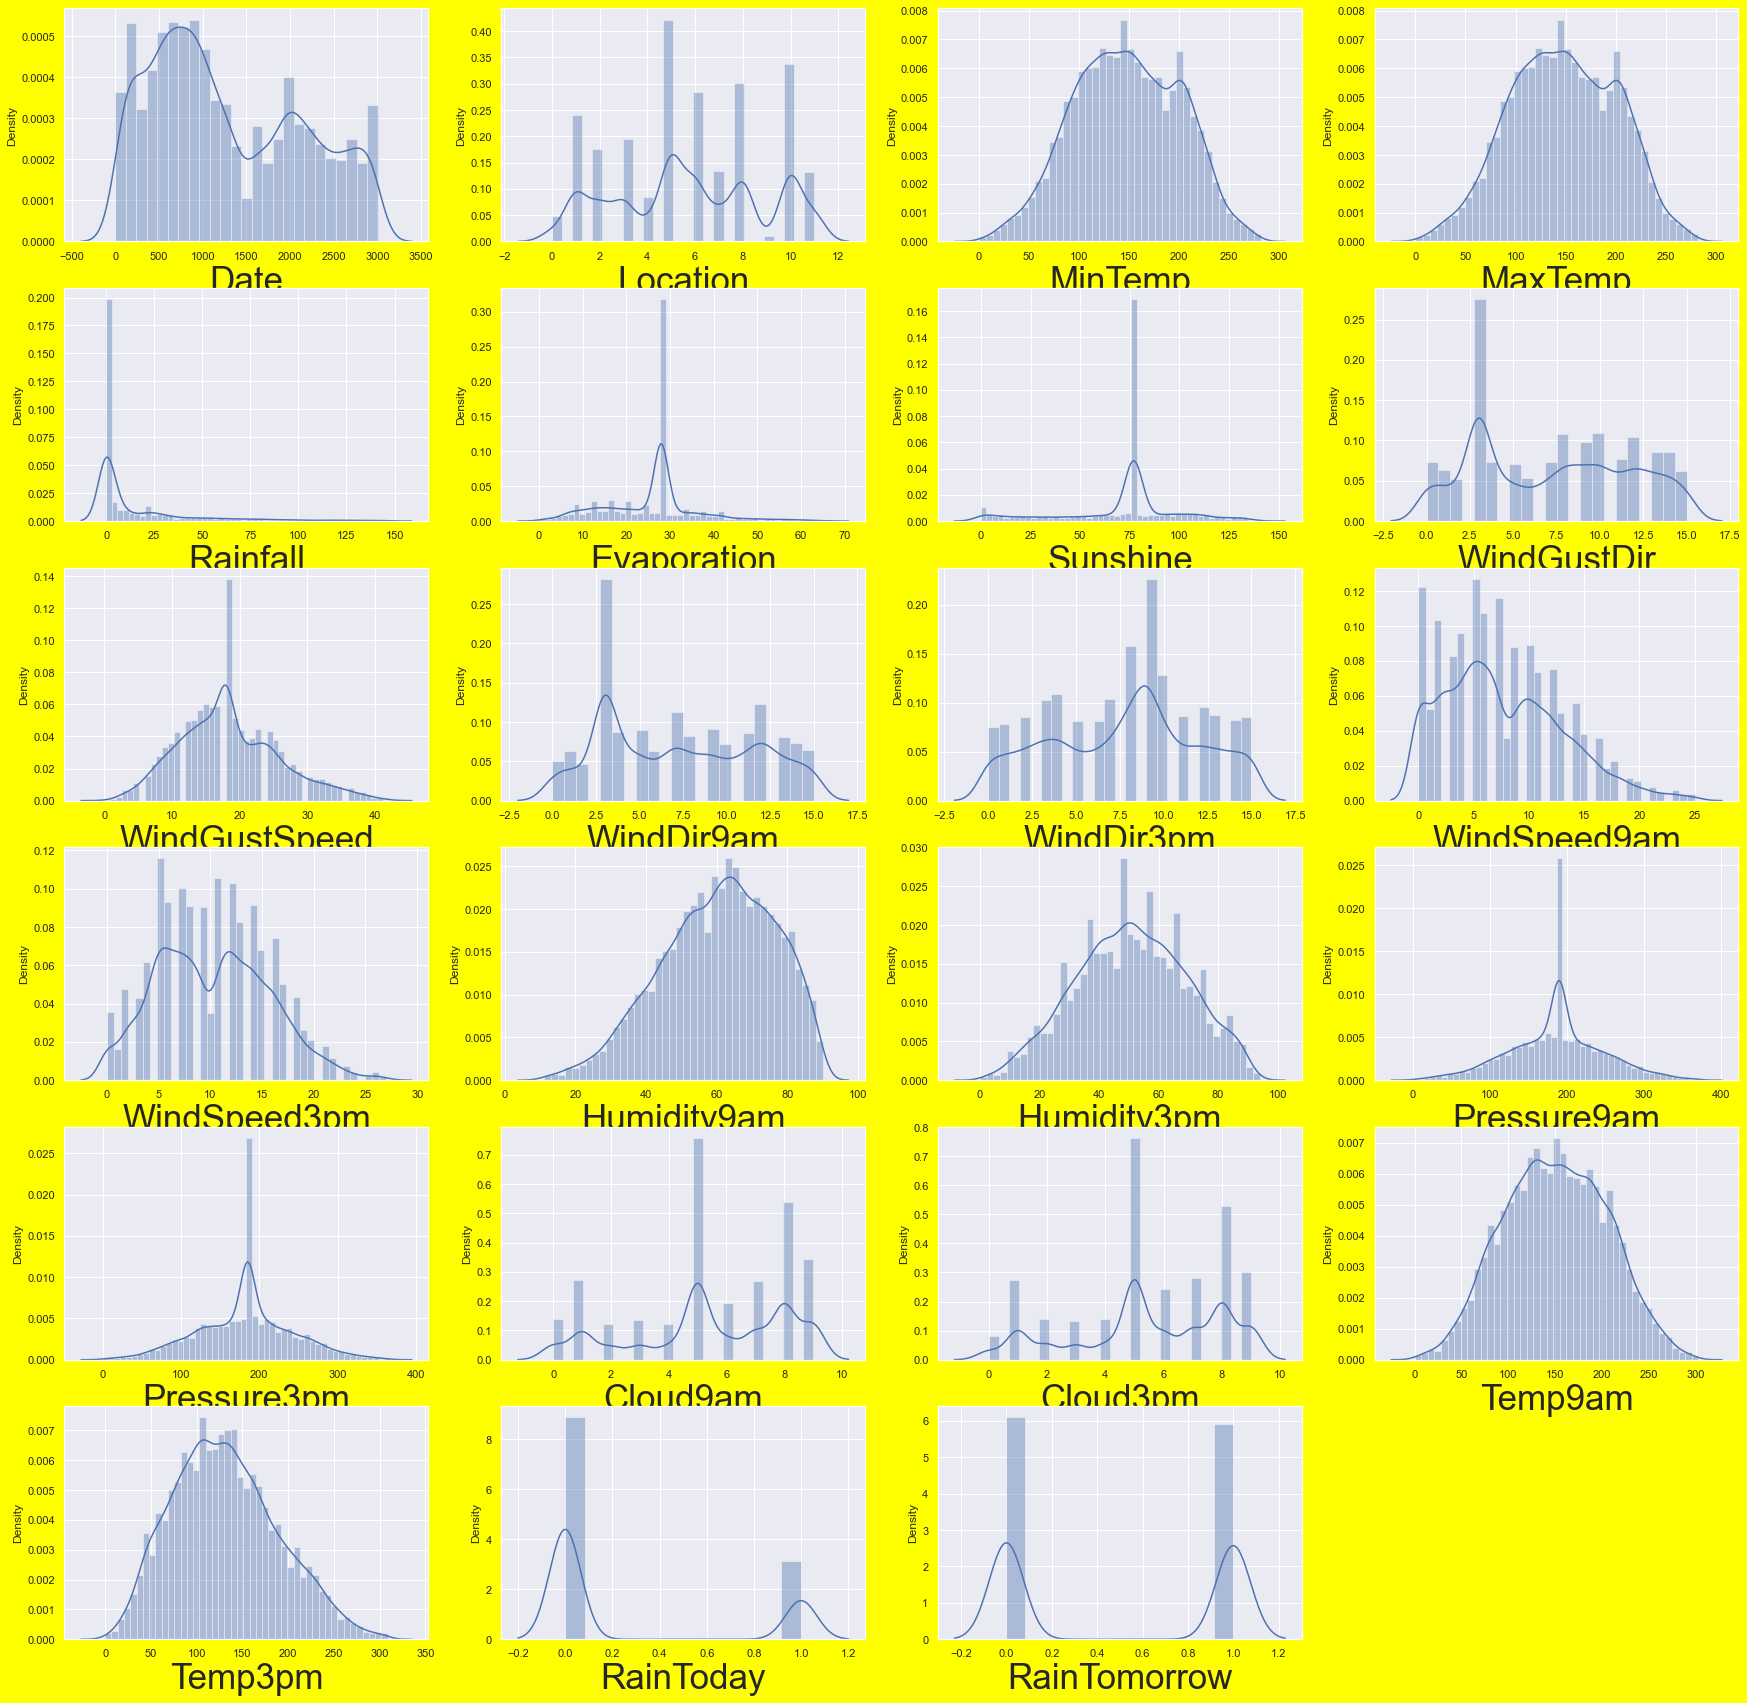

In [104]:
plt.figure(figsize=(30,30),facecolor='yellow')
plotnumber=1

for column in df1:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumber+=1
plt.show()

In [105]:
#checking skewness
x.skew().sort_values(ascending=False)

Rainfall         2.292986
RainToday        1.094690
WindSpeed9am     0.599621
WindGustSpeed    0.456288
Date             0.405399
Evaporation      0.351291
Temp3pm          0.350670
WindSpeed3pm     0.256234
WindDir9am       0.177913
WindGustDir      0.092498
Temp9am          0.013739
Location        -0.000616
Pressure3pm     -0.002409
Pressure9am     -0.025987
MinTemp         -0.052886
MaxTemp         -0.052886
Humidity3pm     -0.067169
WindDir3pm      -0.114008
Humidity9am     -0.375870
Cloud3pm        -0.451880
Cloud9am        -0.468255
Sunshine        -0.699095
dtype: float64

In [106]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [107]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [108]:
data=pipe.fit_transform(x)

In [109]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [110]:
#Sunshine variable is Highly Negative correlation with Target variable so drop Sunshine variable
x.drop('Sunshine',axis=1,inplace=True)

# VIF(Variance Inflation Factor)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [113]:
vif()

Variables  VIF Factor
0            Date    1.432811
1        Location    1.464811
2         MinTemp         inf
3         MaxTemp         inf
4        Rainfall    3.931573
5     Evaporation    1.358531
6     WindGustDir    1.545087
7   WindGustSpeed    2.253693
8      WindDir9am    1.345124
9      WindDir3pm    1.460765
10   WindSpeed9am    2.090648
11   WindSpeed3pm    2.105584
12    Humidity9am    4.035781
13    Humidity3pm    5.510800
14    Pressure9am   20.541564
15    Pressure3pm   19.397354
16       Cloud9am    1.761089
17       Cloud3pm    1.670473
18        Temp9am   19.048953
19        Temp3pm   13.330194
20      RainToday    3.347503

In [114]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)

# Standard Scaler

In [115]:
scale=MinMaxScaler()

In [116]:
#make data in standard scale
x=scale.fit_transform(x)

# Model selection

In [117]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve

In [119]:
LR=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
lst=[LR,rf,kn,sv,dt,gb]

In [121]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{LR.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.7726311101213673
At random state 0, The test accuracy is:-0.7828991315965264
At random state 1, The training accuracy is:-0.7767509186059459
At random state 1, The test accuracy is:-0.7702070808283233
At random state 2, The training accuracy is:-0.7719630330698141
At random state 2, The test accuracy is:-0.7832331329325317
At random state 3, The training accuracy is:-0.7790891882863824
At random state 3, The test accuracy is:-0.7595190380761523
At random state 4, The training accuracy is:-0.7751920721523216
At random state 4, The test accuracy is:-0.770875083500334
At random state 5, The training accuracy is:-0.78031399621423
At random state 5, The test accuracy is:-0.7618570474281897
At random state 6, The training accuracy is:-0.7755261106780982
At random state 6, The test accuracy is:-0.772879091516366
At random state 7, The training accuracy is:-0.7749693798018038
At random state 7, The test accuracy is:-0.7755511022044088
At random st

Observation: At random state 55 giving highest accuracy of 78.82. so we are choosing that as random state

# splitting the data:

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=55)

In [123]:
x_train.shape

(8981, 16)

In [124]:
y_train.shape

(8981,)

In [125]:
x_test.shape

(2994, 16)

In [126]:
y_test.shape

(2994,)

# Logistic Regression:

In [128]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7417954070981211


In [129]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7882431529726119
[[1245  291]
 [ 343 1115]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1536
           1       0.79      0.76      0.78      1458

    accuracy                           0.79      2994
   macro avg       0.79      0.79      0.79      2994
weighted avg       0.79      0.79      0.79      2994

Training accuracy:: 0.7717403407192963
Test accuracy:: 0.7882431529726119


# DECISION TREE CLASSIFIER

In [131]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(dtc_score))

cross validation score: 0.7405427974947808


In [132]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8620574482297929
[[1314  222]
 [ 191 1267]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1536
           1       0.85      0.87      0.86      1458

    accuracy                           0.86      2994
   macro avg       0.86      0.86      0.86      2994
weighted avg       0.86      0.86      0.86      2994

Training accuracy:: 1.0
Test accuracy:: 0.8620574482297929


# KNeighborsClassifier:

In [133]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7338622129436326


In [134]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8410153640614563
[[1192  344]
 [ 132 1326]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1536
           1       0.79      0.91      0.85      1458

    accuracy                           0.84      2994
   macro avg       0.85      0.84      0.84      2994
weighted avg       0.85      0.84      0.84      2994

Training accuracy:: 0.8992317113907138
Test accuracy:: 0.8410153640614563


# RandomForestClassifier:

In [135]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8062630480167015


In [136]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9101536406145625
[[1390  146]
 [ 123 1335]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1536
           1       0.90      0.92      0.91      1458

    accuracy                           0.91      2994
   macro avg       0.91      0.91      0.91      2994
weighted avg       0.91      0.91      0.91      2994

Training accuracy:: 1.0
Test accuracy:: 0.9101536406145625


# ENSEMBLE TECHNIQUES

# 1.ADA BOOST CLASSIFIER

In [137]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=5,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.6894363256784969


In [138]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7969271877087508
[[1252  284]
 [ 324 1134]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1536
           1       0.80      0.78      0.79      1458

    accuracy                           0.80      2994
   macro avg       0.80      0.80      0.80      2994
weighted avg       0.80      0.80      0.80      2994

Training accuracy:: 0.7910032290390825
Test accuracy:: 0.7969271877087508


# 2. Gradient Boosting classifier

In [139]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=5,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7002922755741128


In [140]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",accuracy_score(y_test,predicted_grbc))

0.8226452905811623
[[1278  258]
 [ 273 1185]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1536
           1       0.82      0.81      0.82      1458

    accuracy                           0.82      2994
   macro avg       0.82      0.82      0.82      2994
weighted avg       0.82      0.82      0.82      2994

Training accuracy:: 0.8303084289054671
Test accuracy:: 0.8226452905811623


# plotting roc curve:

plotting for training score for different models:

In [141]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

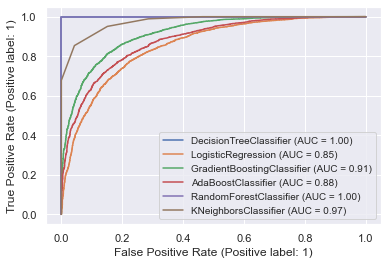

In [142]:
disp=plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(logreg,x_train,y_train,ax=disp.ax_)

plot_roc_curve(grbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(adb,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

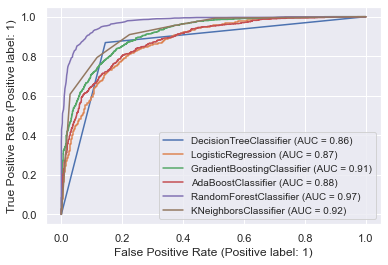

In [143]:
disp=plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)

plot_roc_curve(grbc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# Conclusion:

# choosing Random Forest Classifier as best model for our dataset as it is giving the best test accuracy. So, this is our final model

# HYPER PARAMETER TUNING:

In [144]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [145]:
gridsearch=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

In [146]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]})

In [147]:
gridsearch.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [148]:
rfc=gridsearch.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=10)

In [149]:
print(rfc.score(x_train,y_train))
predicted_rfc=rfc.predict(x_test)

1.0


In [151]:
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8051774530271398


In [152]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9114896459585838
[[1386  150]
 [ 115 1343]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1536
           1       0.90      0.92      0.91      1458

    accuracy                           0.91      2994
   macro avg       0.91      0.91      0.91      2994
weighted avg       0.91      0.91      0.91      2994

Training accuracy:: 1.0
Test accuracy:: 0.9114896459585838


Observation: we can see here, there is a slightly increment in our testing score. And this is our successful model

# Report of RandomForestClassifier

In [153]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,predicted_rfc))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1536
           1       0.90      0.92      0.91      1458

    accuracy                           0.91      2994
   macro avg       0.91      0.91      0.91      2994
weighted avg       0.91      0.91      0.91      2994



<AxesSubplot:>

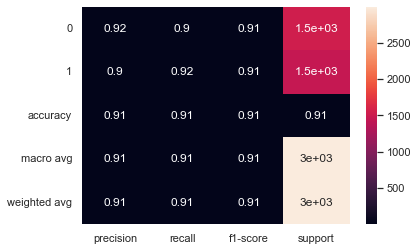

In [154]:
clsf_repo = classification_report(y_test,predicted_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [155]:
print("roc auc score::",roc_auc_score(y_test,predicted_rfc))

roc auc score:: 0.911734289266118


In [156]:
fpr1, tpr1, thresh1 = roc_curve(y_test,predicted_rfc, pos_label=1)

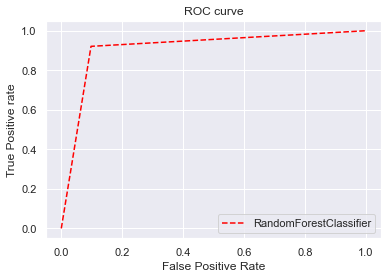

In [157]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [158]:
import pickle
filename='Rainfall_prediction_project.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [159]:
loaded_model=pickle.load(open('Rainfall_prediction_project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.14896459585839


# Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

In [160]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     13.4       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4      7.4       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     12.9       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2      9.2       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     17.5       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

# Apply Label Encoder

In [161]:
#independent variables
x=df.drop('Rainfall',axis=1)
#dependent variable(target variable)
y=df['Rainfall']

In [162]:
#apply label encoder of independent variables
x=x.apply(LabelEncoder().fit_transform)

In [163]:
df2=x

In [164]:
#add target variable
df2['Rainfall']=y

In [165]:
df2.head()

Date  Location  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  \
0     0         1      150      150           28        77           13   
1     1         1       89       89           28        77           14   
2     2         1      144      144           28        77           15   
3     3         1      107      107           28        77            4   
4     4         1      191      191           28        77           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  Pressure9am  \
0             21          13          14  ...           16           90   
1             21           6          15  ...           19          119   
2             22          13          15  ...           24           89   
3              9           9           0  ...           10          189   
4             19           1           7  ...           27          121   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          103         9         5      145      134          0             0   
1          110         5         5      148      160          0             0   
2          119         5         2      187      149          0             0   
3          160         5         5      158      182          0             0   
4           92         8         9      155      214          0             0   

   Rainfall  
0       0.6  
1       0.0  
2       0.0  
3       0.0  
4       1.0  

[5 rows x 23 columns]

# Check the Outliers

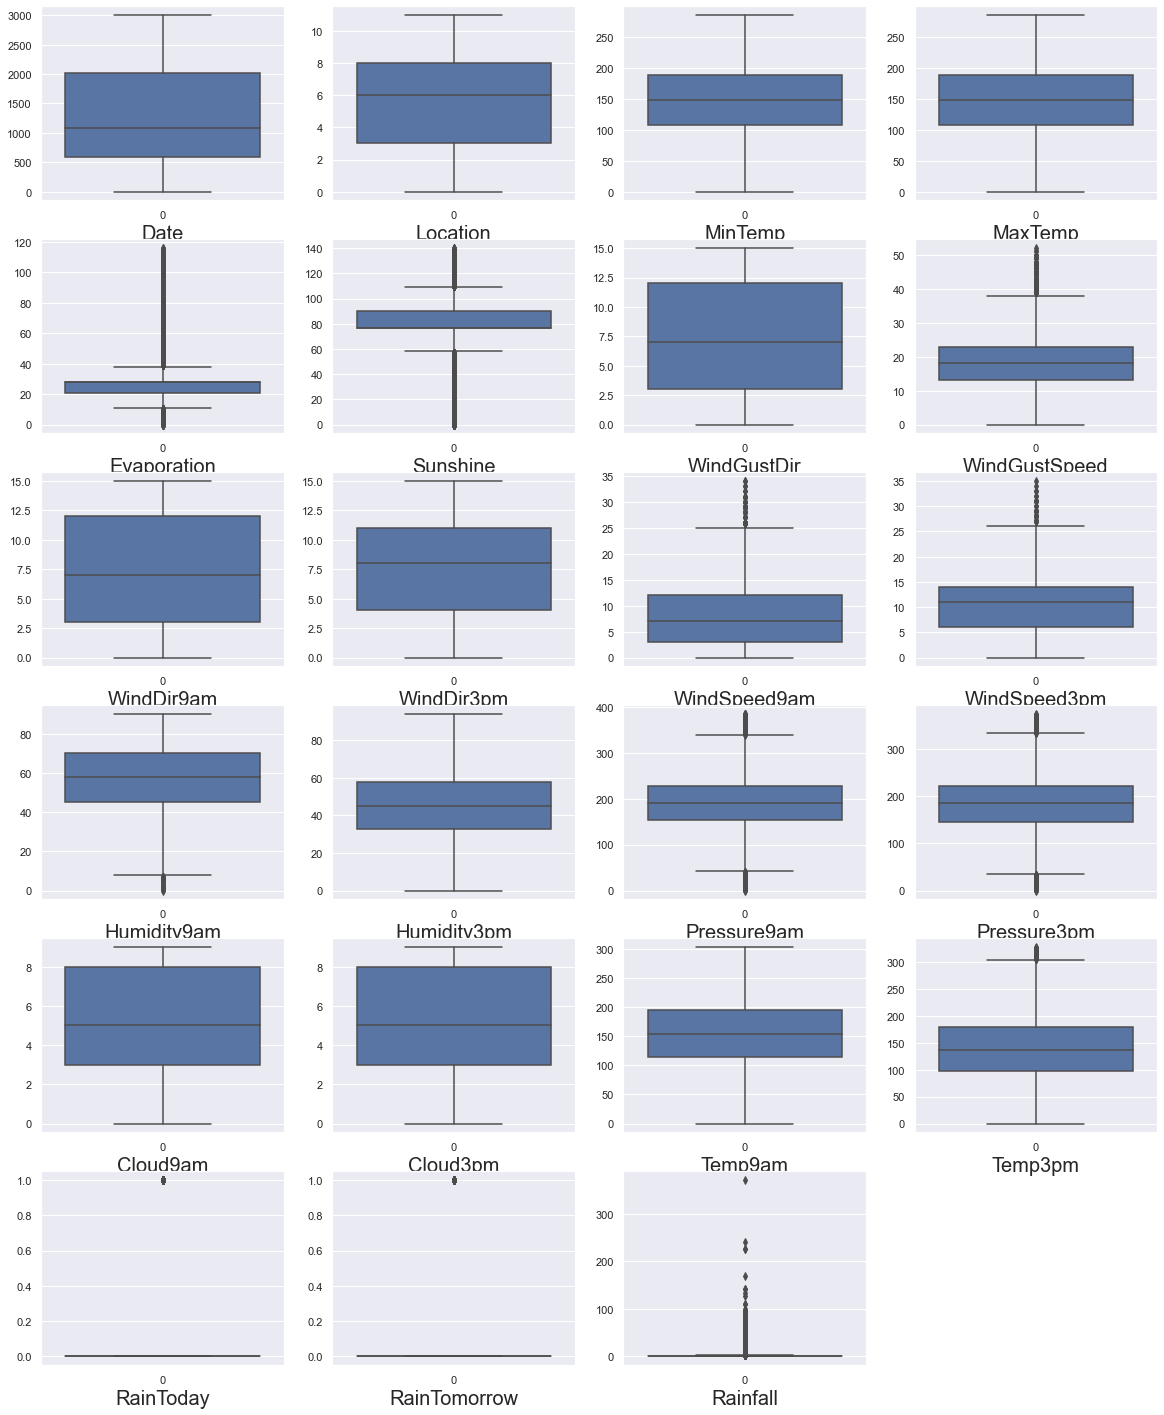

In [167]:
#Let's check for outliers
plt.figure(figsize=(20,25))
plotnumber=1
for column in df2:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data=df2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [168]:
#removing outliers
z=np.abs(zscore(df2))

In [169]:
threshold=3
print(np.where(z>3))

(array([  44,   52,   61,   62,   62,   67,   68,  123,  267,  381,  381,
        431,  462,  563,  568,  568,  683,  699,  713,  770,  796,  797,
        802,  928,  935,  949,  979,  980,  980,  980, 1008, 1009, 1011,
       1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265,
       1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644,
       1661, 1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016,
       2028, 2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230,
       2231, 2265, 2429, 2488, 2500, 2505, 2527, 2541, 2593, 2676, 2677,
       2735, 2827, 2835, 2841, 2849, 2849, 2855, 2863, 2869, 2877, 2883,
       2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925,
       2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003, 3009, 3045,
       3051, 3059, 3059, 3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082,
       3082, 3089, 3089, 3099, 3099, 3101, 3141, 3143, 3150, 3157, 3164,
       3172, 3172, 3178, 3185, 3192, 3199, 3206, 3

In [171]:
#remove outliers
df_new=df2[(z<3).all(axis=1)]

In [172]:
#dataset shape after removing outliers
df_new.shape

(7992, 23)

In [173]:
df2=df_new

# Checking Skewness

In [174]:
#independent variables
x=df2.drop('Rainfall',axis=1)
#dependent variable
y=df2['Rainfall']

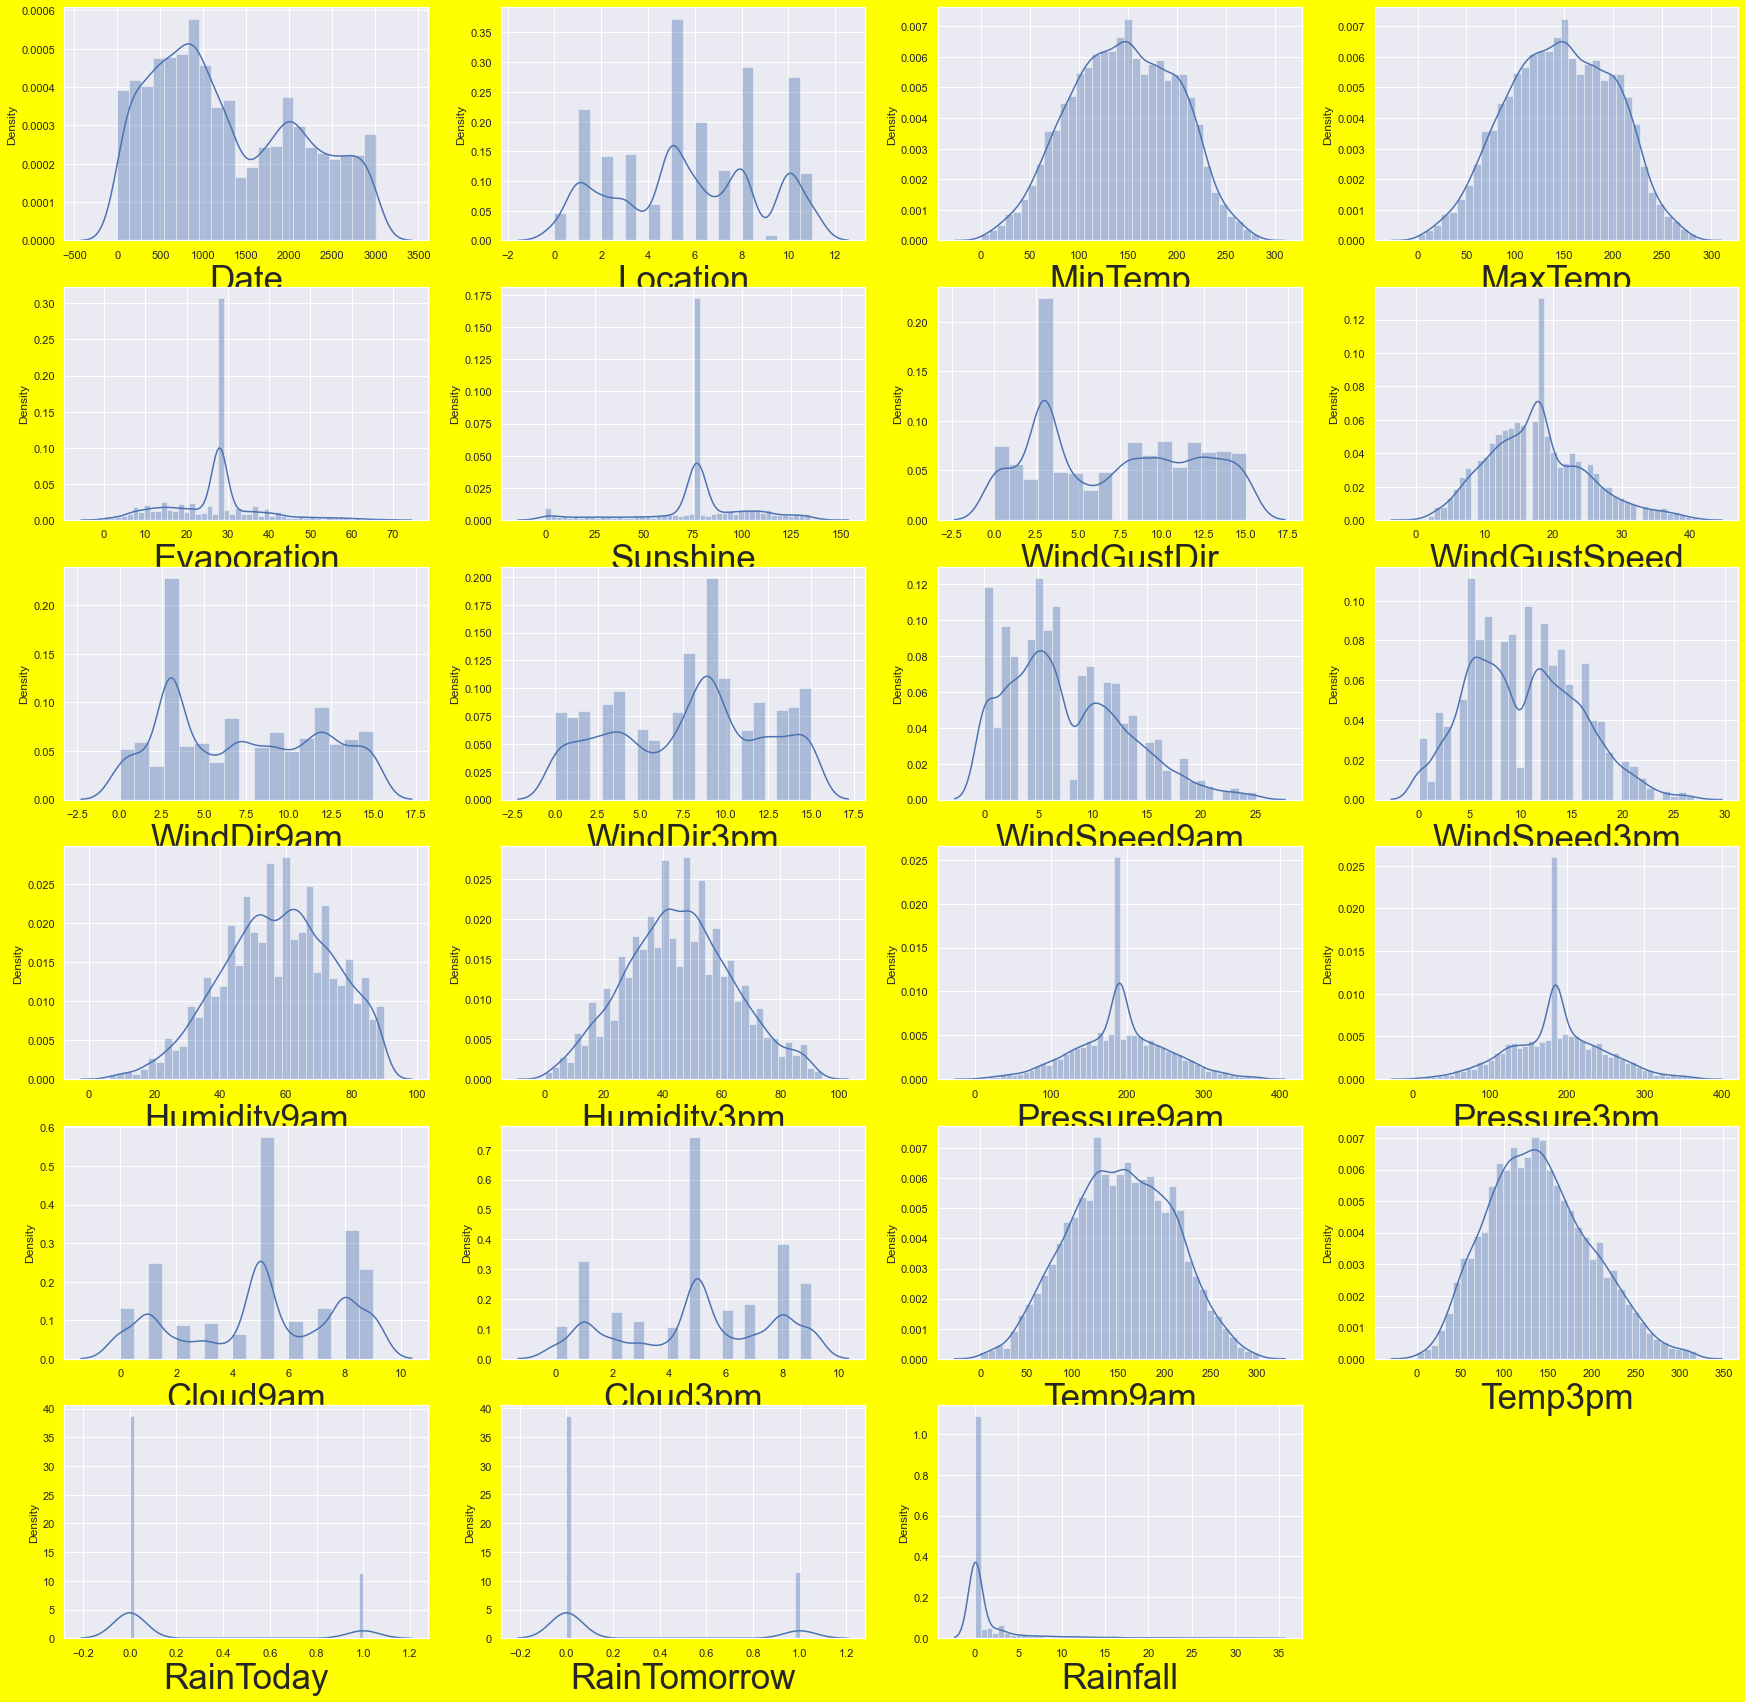

In [175]:
plt.figure(figsize=(30,30),facecolor='yellow')
plotnumbers=1

for column in df2:
    if plotnumbers<=24:
        ax=plt.subplot(6,4,plotnumbers)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumbers+=1
plt.show()

In [176]:
#checking skewness
x.skew().sort_values(ascending=False)

RainToday        1.302136
RainTomorrow     1.291967
WindSpeed9am     0.659841
Evaporation      0.502978
WindGustSpeed    0.491024
Date             0.400017
Temp3pm          0.342058
WindSpeed3pm     0.289687
WindDir9am       0.165621
Humidity3pm      0.117177
WindGustDir      0.109778
Pressure3pm      0.053477
Pressure9am      0.032808
Temp9am         -0.030221
Location        -0.038161
MaxTemp         -0.075855
MinTemp         -0.075855
WindDir3pm      -0.127045
Humidity9am     -0.222803
Cloud3pm        -0.239722
Cloud9am        -0.305069
Sunshine        -0.724878
dtype: float64

# Removing skewness

In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [178]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipe=Pipeline(steps=[('s',scaler),('p',power)])

In [179]:
data=pipe.fit_transform(x)

In [180]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

# VIF(Variance Inflation Factor)

In [181]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [182]:
vif()

Variables  VIF Factor
0            Date    1.415933
1        Location    1.498058
2         MinTemp         inf
3         MaxTemp         inf
4     Evaporation    1.576223
5        Sunshine    2.069924
6     WindGustDir    1.621728
7   WindGustSpeed    2.333140
8      WindDir9am    1.338419
9      WindDir3pm    1.490433
10   WindSpeed9am    2.002122
11   WindSpeed3pm    2.015435
12    Humidity9am    3.902959
13    Humidity3pm    5.364263
14    Pressure9am   20.629878
15    Pressure3pm   19.636946
16       Cloud9am    1.889533
17       Cloud3pm    1.776036
18        Temp9am   17.229859
19        Temp3pm   12.315443
20      RainToday    1.377539
21   RainTomorrow    1.431602

In [183]:
#Cloud9am and Cloud3pm are Same VIF Factor
x.drop('Cloud9am',axis=1,inplace=True)
#WindSpeed3pm and WindSpeed9am as same VIF Factor
x.drop('WindSpeed9am',axis=1,inplace=True)
#WindDir9am and WindDir3pm are same VIF Factor
x.drop('WindDir3pm',axis=1,inplace=True)
#Location and Date variables as same VIF Factor
x.drop('Location',axis=1,inplace=True)
#Evaporation and WindGustDir are Same vif Factor
x.drop('Evaporation',axis=1,inplace=True)

# Standard Scale

In [184]:
x=scale.fit_transform(x)

# Model Selection

In [191]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error

In [192]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [193]:
model_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

# LogisticRegression

In [197]:
from sklearn.linear_model import LogisticRegression
ls=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ls.fit(x_train,y_train)
    ls_predict_test=ls.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{ls.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,ls_predict_test)}')

At random state 0, The training accuracy is:-0.4877204133192119


ValueError: continuous is not supported